In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
sequence_length = 4
batch_size = 1
input_dim = 512
d_model = 512
x = torch.randn((batch_size , sequence_length , input_dim))

In [3]:
x.size()

torch.Size([1, 4, 512])

In [4]:
qkv_layer = nn.Linear(input_dim , 3*d_model)

In [5]:
qkv = qkv_layer(x)

In [6]:
qkv.shape

torch.Size([1, 4, 1536])

Text(0.5, 1.0, 'qkv distribution')

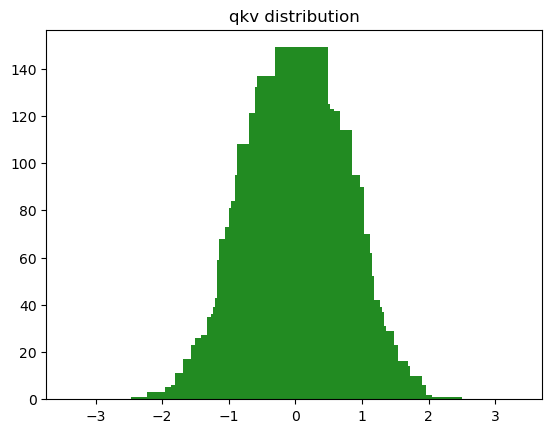

In [7]:
import matplotlib.pyplot as plt
y_val = torch.histc(qkv, bins=200, min=-3, max=3)
x_val = np.arange(-1, 1, 0.01) * 3
plt.bar(x_val, y_val, align='center', color=['forestgreen'])
plt.title('qkv distribution')

In [8]:
import math

In [9]:
num_heads = 8
head_dim = d_model // num_heads
qkv = qkv.reshape(batch_size, sequence_length, num_heads, 3 * head_dim)

In [10]:
qkv.shape   

torch.Size([1, 4, 8, 192])

In [11]:
qkv = qkv.permute(0, 2, 1, 3) # [batch_size, num_heads, sequence_length, 3*head_dim]
qkv.shape

torch.Size([1, 8, 4, 192])

In [12]:
q, k, v = qkv.chunk(3, dim=-1)
q.shape, k.shape, v.shape

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]))

In [13]:
d_k = q.size()[-1]
d_k

64

In [14]:
scaled = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(d_k)
scaled.shape

torch.Size([1, 8, 4, 4])

In [15]:
k.T.shape

C:\Program Files\nodejs\ipykernel_11536\3717780648.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3701.)
  k.T.shape


torch.Size([64, 4, 8, 1])

In [16]:
y = torch.randn(2, 3)
y

tensor([[-1.4169, -1.6523,  0.6123],
        [-1.5387,  0.2796, -1.5298]])

In [17]:
torch.transpose(y, -2, -1)

tensor([[-1.4169, -1.5387],
        [-1.6523,  0.2796],
        [ 0.6123, -1.5298]])

In [18]:
torch.transpose(y, 1, 0)

tensor([[-1.4169, -1.5387],
        [-1.6523,  0.2796],
        [ 0.6123, -1.5298]])

In [19]:
#k.transpose(-1, -2) == k.transpose(-2, -1)

In [20]:
k.transpose(-1, -2).shape

torch.Size([1, 8, 64, 4])

In [21]:
mask = torch.full(scaled.size() , float('-inf'))
mask

tensor([[[[-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf],
          [-inf,

In [22]:
mask = torch.triu(mask , diagonal = 1)
mask

tensor([[[[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0.,

In [23]:
(scaled+mask)[0][0]

tensor([[ 0.2892,    -inf,    -inf,    -inf],
        [ 0.5952, -0.3635,    -inf,    -inf],
        [ 0.7494, -0.0447,  0.4440,    -inf],
        [-0.4141, -0.0221, -0.2383, -0.2696]], grad_fn=<SelectBackward0>)

In [24]:
scaled +=mask

In [25]:
attention = F.softmax(scaled , dim = -1)

In [26]:
attention.shape

torch.Size([1, 8, 4, 4])

In [27]:
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.7229, 0.2771, 0.0000, 0.0000],
        [0.4569, 0.2065, 0.3366, 0.0000],
        [0.2072, 0.3066, 0.2469, 0.2393]], grad_fn=<SelectBackward0>)

In [28]:
value = torch.matmul(attention , v)

In [29]:
value.shape

torch.Size([1, 8, 4, 64])

## Function

In [30]:
import math

def scaled_dot_product(q , k , v , mask = None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q,k.transpose(-1,-2)) /math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = F.softmax(scaled , dim = -1)
    values = torch.matmul(attention , v)
    return values , attention

In [31]:
values, attention = scaled_dot_product(q, k, v, mask=mask)

In [32]:
attention.shape

torch.Size([1, 8, 4, 4])

In [33]:
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.7229, 0.2771, 0.0000, 0.0000],
        [0.4569, 0.2065, 0.3366, 0.0000],
        [0.2072, 0.3066, 0.2469, 0.2393]], grad_fn=<SelectBackward0>)

In [34]:
values.size()

torch.Size([1, 8, 4, 64])

In [35]:
values = values.reshape(batch_size, sequence_length, num_heads * head_dim)
values.size()

torch.Size([1, 4, 512])

In [36]:
linear_layer = nn.Linear(d_model , d_model)

In [37]:
linear_layer

Linear(in_features=512, out_features=512, bias=True)

In [38]:
out = linear_layer(values)

In [39]:
out.shape

torch.Size([1, 4, 512])

## Class

In [40]:

import torch
import torch.nn as nn
import math

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention
    

In [43]:
class MultiHeadAttention(nn.Module):

    def __init__(self , input_dim , d_model , num_heads):
        super().__init__()
        self.input_dim = input_dim
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(input_dim , 3*d_model)
        self.linear_layer = nn.Linear(d_model , d_model)

    def forward(self , x , mask = None):
        batch_size , sequence_length,input_dim = x.size()
        print(f"x.size():{x.size()}")
        qkv = self.qkv_layer(x)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.reshape(batch_size, sequence_length, self.num_heads, 3 * self.head_dim)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.permute(0, 2, 1, 3)
        print(f"qkv.size(): {qkv.size()}")
        q, k, v = qkv.chunk(3, dim=-1)
        print(f"q size: {q.size()}, k size: {k.size()}, v size: {v.size()}, ")
        values, attention = scaled_dot_product(q, k, v, mask)
        print(f"values.size(): {values.size()}, attention.size:{ attention.size()} ")
        values = values.reshape(batch_size, sequence_length, self.num_heads * self.head_dim)
        print(f"values.size(): {values.size()}")
        out = self.linear_layer(values)
        print(f"out.size(): {out.size()}")
        return out

    


#### Input

In [44]:

input_dim = 1024
d_model = 512
num_heads = 8

batch_size = 30
sequence_length = 5
x = torch.randn( (batch_size, sequence_length, input_dim) )

model = MultiHeadAttention(input_dim, d_model, num_heads)
out = model.forward(x)

x.size():torch.Size([30, 5, 1024])
qkv.size(): torch.Size([30, 5, 1536])
qkv.size(): torch.Size([30, 5, 8, 192])
qkv.size(): torch.Size([30, 8, 5, 192])
q size: torch.Size([30, 8, 5, 64]), k size: torch.Size([30, 8, 5, 64]), v size: torch.Size([30, 8, 5, 64]), 
values.size(): torch.Size([30, 8, 5, 64]), attention.size:torch.Size([30, 8, 5, 5]) 
values.size(): torch.Size([30, 5, 512])
out.size(): torch.Size([30, 5, 512])
